In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
pd.set_option("display.max_columns",None)

### Chargement du dataset

In [2]:
df = pd.read_csv("2015-building-energy-benchmarking.csv")

In [3]:
df.head(4)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081


### Définition de la problématique, choix des colonnes

In [ ]:
#Qu'est-ce qui consomme le plus d'énergie ? :
#Quel type de structure consomme le plus d'énergie ?

In [5]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [6]:
columns = ['BuildingType','PrimaryPropertyType','YearBuilt','NumberofBuildings','NumberofFloors',
           'PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','ListOfAllPropertyUseTypes',
           'LargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','ENERGYSTARScore',
           'SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)',
           'SteamUse(kBtu)','Electricity(kWh)','Electricity(kBtu)','NaturalGas(therms)','NaturalGas(kBtu)','OtherFuelUse(kBtu)',
           'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)']

df = df[columns]
df.head()

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,NonResidential,Hotel,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64
1,NonResidential,Hotel,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38
2,NonResidential,Hotel,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92
3,NonResidential,Hotel,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38
4,NonResidential,Hotel,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02


In [ ]:
#Vérification des types
df.dtypes

BuildingType                          object
PrimaryPropertyType                   object
YearBuilt                              int64
NumberofBuildings                      int64
NumberofFloors                       float64
PropertyGFATotal                       int64
PropertyGFAParking                     int64
PropertyGFABuilding(s)                 int64
ListOfAllPropertyUseTypes             object
LargestPropertyUseType                object
LargestPropertyUseTypeGFA            float64
SecondLargestPropertyUseType          object
SecondLargestPropertyUseTypeGFA      float64
ThirdLargestPropertyUseType           object
ThirdLargestPropertyUseTypeGFA       float64
ENERGYSTARScore                      float64
SiteEUI(kBtu/sf)                     float64
SiteEUIWN(kBtu/sf)                   float64
SourceEUI(kBtu/sf)                   float64
SourceEUIWN(kBtu/sf)                 float64
SiteEnergyUse(kBtu)                  float64
SiteEnergyUseWN(kBtu)                float64
SteamUse(k

In [8]:
#Les colonnes sont du bon type

### Exploration des données

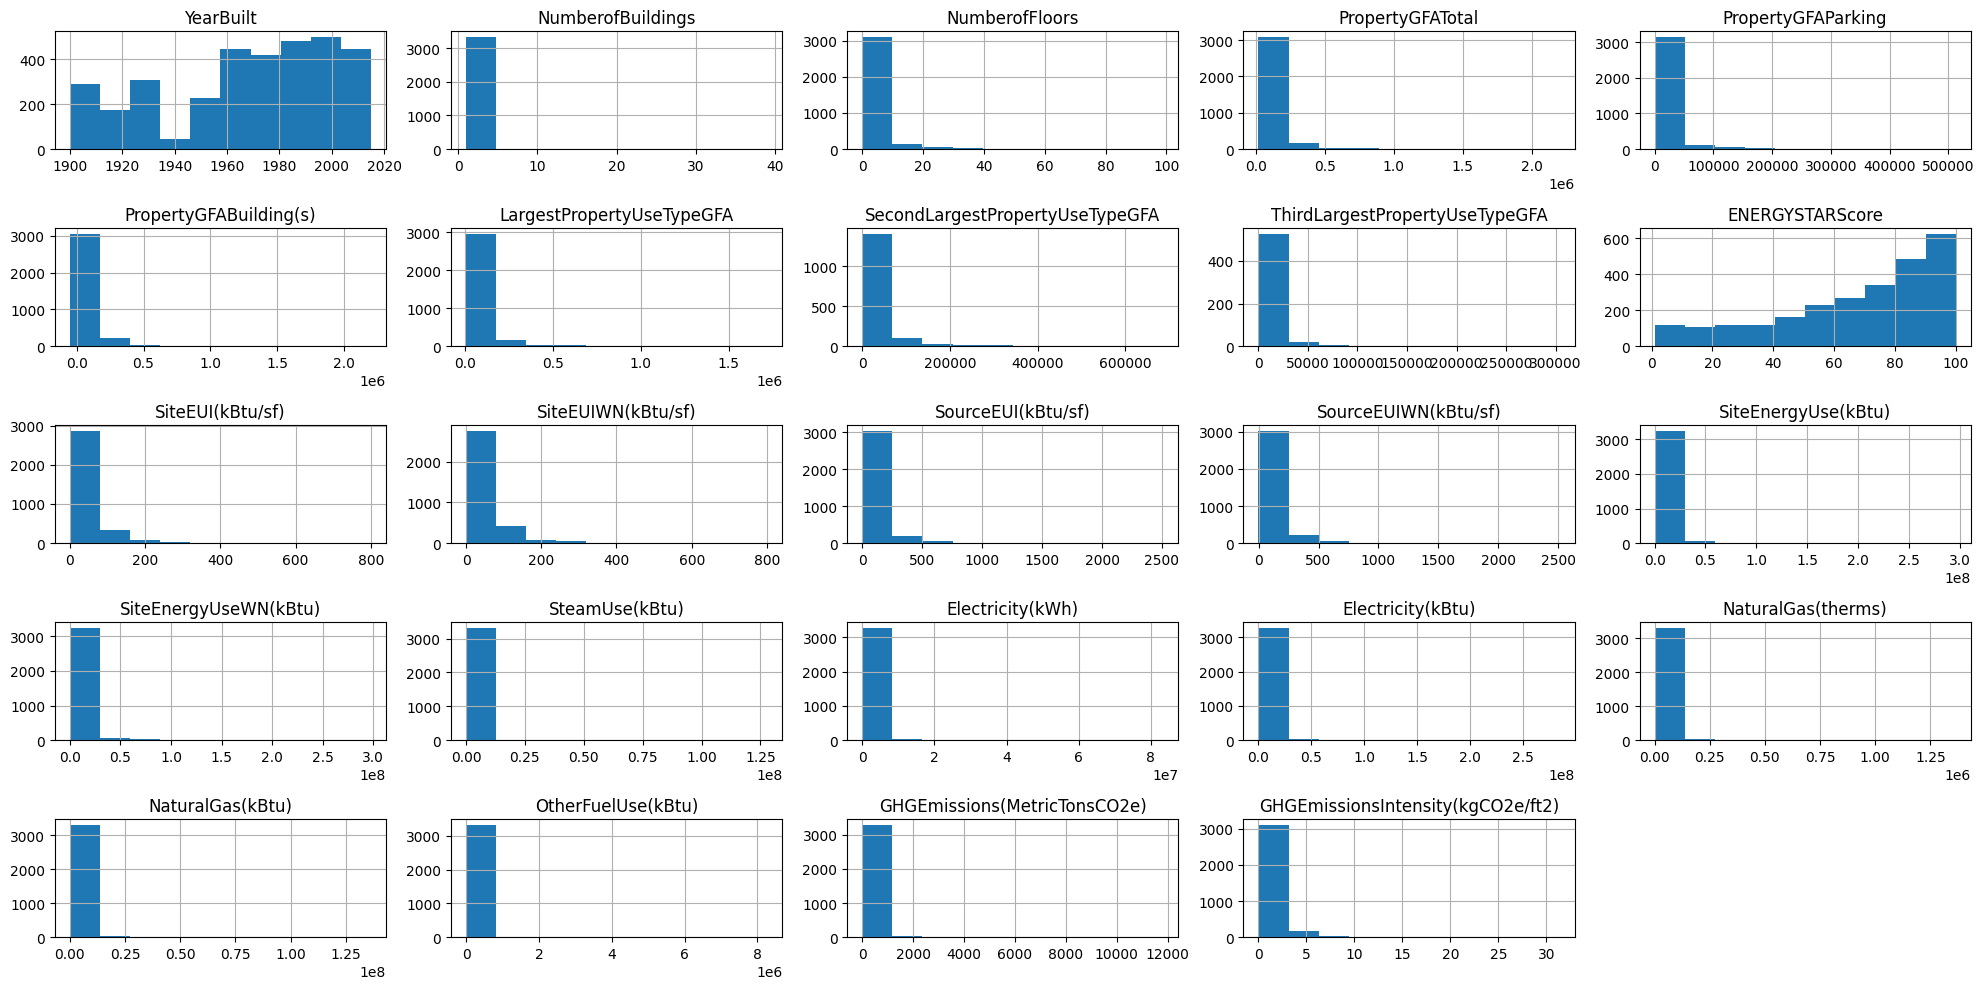

In [ ]:
#Y a-t-il des choses qui ne vont pas dans les données
df.hist(figsize=(20,10))
plt.tight_layout()

In [10]:
#Il y a des colonnes qui ont des valeurs nulles inattendues
#La colonne PropertyGFABuilding(s) semble avoir des valeus négatives

##### Problème de l'Aire et Consommation d'énergie qui semblent nulles

In [11]:
#Est-ce vraiment possible d'avoir une aire et une consommation dénergie = 0
print(df.shape)

columns_list = ['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','SiteEUI(kBtu/sf)',
                'SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)',
                'SteamUse(kBtu)','Electricity(kWh)','Electricity(kBtu)','NaturalGas(therms)','NaturalGas(kBtu)','OtherFuelUse(kBtu)',
                'GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)']

for column in columns_list:
    print("----------------------------------")
    print((df[column] == 0).value_counts())

(3340, 30)
----------------------------------
LargestPropertyUseTypeGFA
False    3340
Name: count, dtype: int64
----------------------------------
SecondLargestPropertyUseTypeGFA
False    3229
True      111
Name: count, dtype: int64
----------------------------------
ThirdLargestPropertyUseTypeGFA
False    3296
True       44
Name: count, dtype: int64
----------------------------------
SiteEUI(kBtu/sf)
False    3338
True        2
Name: count, dtype: int64
----------------------------------
SiteEUIWN(kBtu/sf)
False    3328
True       12
Name: count, dtype: int64
----------------------------------
SourceEUI(kBtu/sf)
False    3338
True        2
Name: count, dtype: int64
----------------------------------
SourceEUIWN(kBtu/sf)
False    3328
True       12
Name: count, dtype: int64
----------------------------------
SiteEnergyUse(kBtu)
False    3338
True        2
Name: count, dtype: int64
----------------------------------
SiteEnergyUseWN(kBtu)
False    3328
True       12
Name: count, dtype: i

In [12]:
#Observation des colonnes les zéros ne devraient pas apparaître : SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), 
#SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), GHGEmissions(MetricTonsCO2e), GHGEmissionsIntensity(kgCO2e/ft2)

#Recherche de corrélation qui expliqueraient les valeurs nulles
df[df['SiteEUIWN(kBtu/sf)'] == 0].head(8)

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
44,NonResidential,Retail Store,1920,1,2.0,57428,0,57428,"Non-Refrigerated Warehouse, Other, Retail Store",Retail Store,34617.0,Non-Refrigerated Warehouse,13028.0,Other,9783.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
207,NonResidential,Large Office,1976,1,33.0,791396,0,791396,"Office, Other, Parking, Restaurant",Office,637099.0,Parking,132465.0,Other,33110.0,89.0,59.8,0.0,187.7,0.0,40451748.0,0.0,0.0,11855730.0,40453430.0,0.0,0.0,0.0,282.01,0.14
451,NonResidential,Small- and Mid-Sized Office,1904,1,5.0,78920,0,78920,Office,Office,65600.0,NaN,NaN,NaN,NaN,95.0,30.4,0.0,95.0,0.0,1992690.0,0.0,0.0,580321.0,1980139.0,0.0,0.0,12551.0,13.80,0.07
492,NonResidential,Large Office,2005,1,42.0,1592914,297457,1295457,"Data Center, Financial Office, Office, Parking...",Office,914832.0,Parking,348788.0,Financial Office,303910.0,96.0,46.5,0.0,143.6,0.0,58041572.0,0.0,1099052.0,16567390.0,56530281.0,4146.0,414587.0,0.0,500.93,0.16
572,NonResidential,Large Office,1929,1,27.0,216571,13320,203251,"Office, Other - Technology/Science, Parking",Office,182604.0,Parking,13320.0,Other - Technology/Science,6246.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
578,NonResidential,Large Office,1981,1,42.0,1249055,201121,1047934,"Data Center, Medical Office, Office, Parking, ...",Office,983697.0,Parking,296815.0,Medical Office,12941.0,93.0,42.0,0.0,127.7,0.0,41818868.0,0.0,0.0,11686460.0,39875857.0,0.0,0.0,1943011.0,277.98,0.09
614,NonResidential,Large Office,1994,1,10.0,381511,0,381511,"Office, Parking",Office,220033.0,Parking,168978.0,NaN,NaN,85.0,53.7,0.0,163.8,0.0,11813861.0,0.0,0.0,3316016.0,11314716.0,4996.0,499616.0,0.0,105.41,0.15
894,NonResidential,Worship Facility,1910,1,2.0,23931,0,23931,Worship Facility,Worship Facility,23931.0,NaN,NaN,NaN,NaN,91.0,18.8,0.0,33.5,0.0,450518.0,0.0,0.0,46215.0,157691.0,2928.0,292834.0,0.0,16.65,0.67


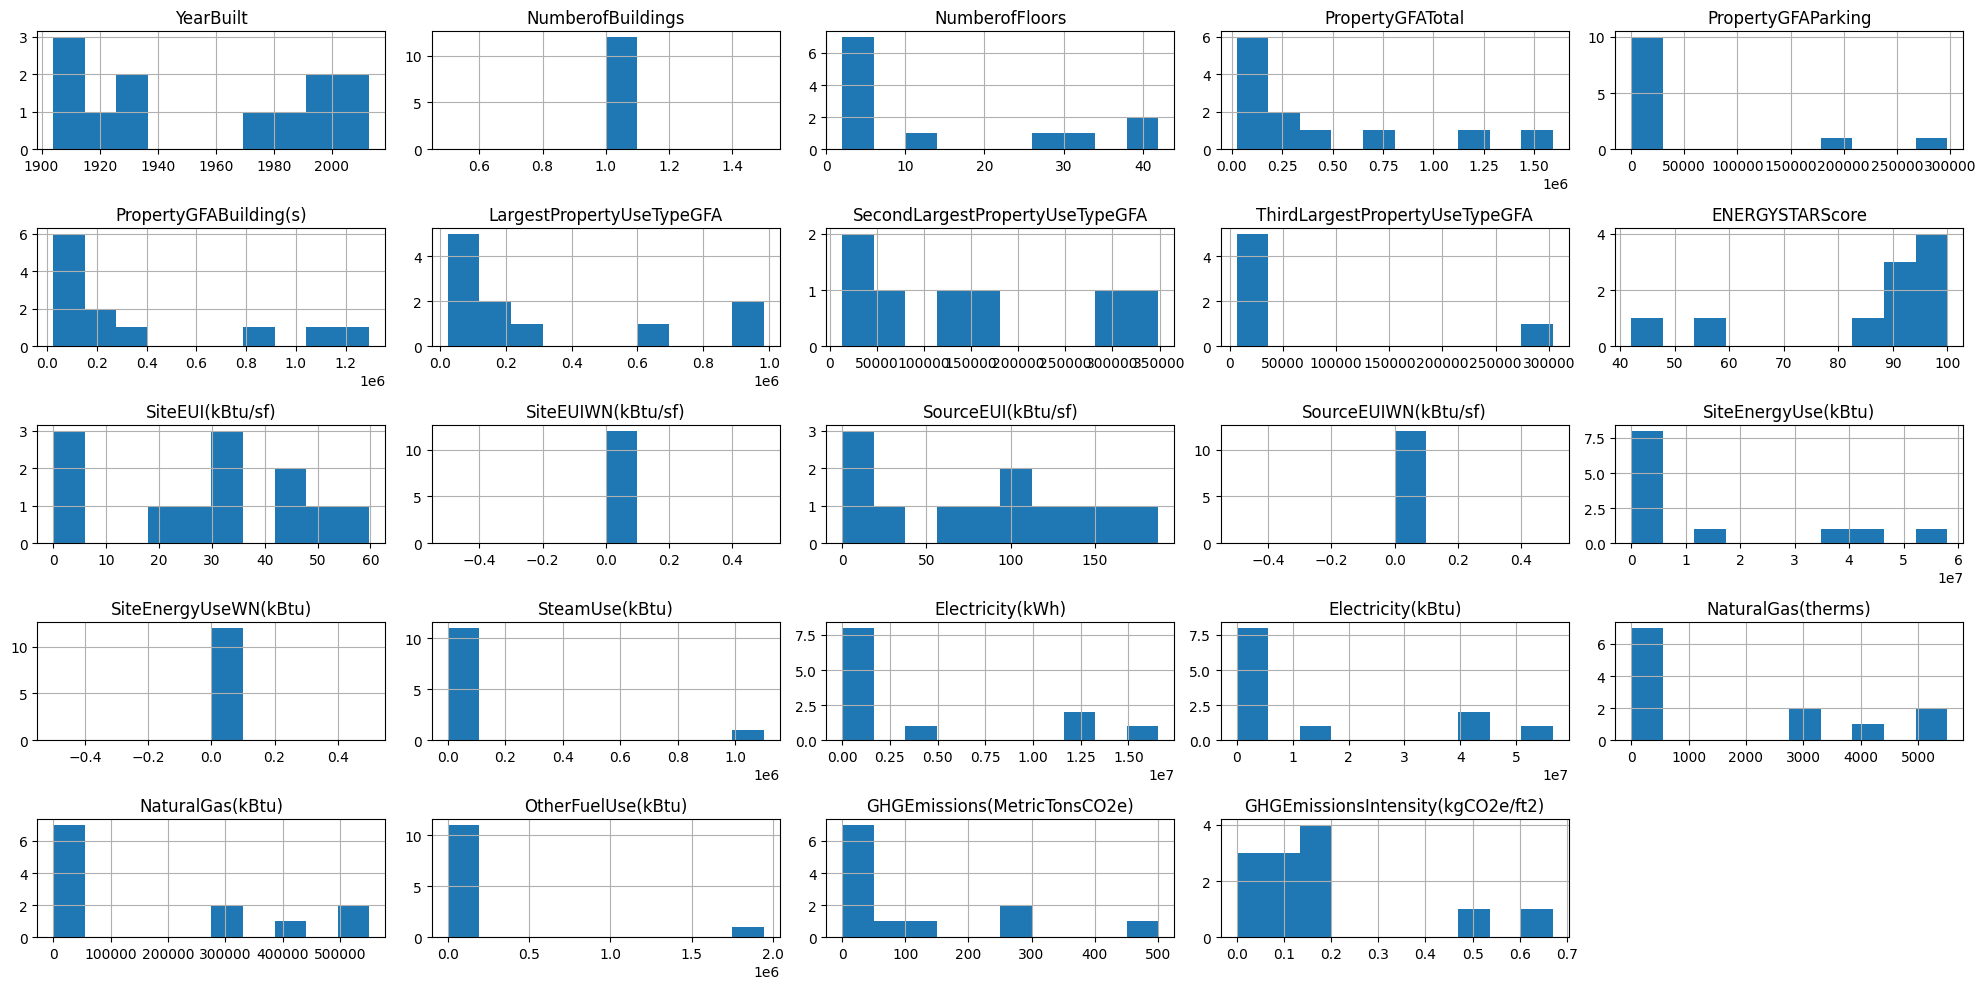

In [13]:
#Visualistion des colonnes pour les valeurs nulles
df[df['SiteEUIWN(kBtu/sf)'] == 0].hist(figsize=(20,10))
plt.tight_layout()

In [14]:
#La visualisation ne montre pas grand-chose
#Selon le tableau, la seule différence semble être que les valeurs des colonnes EUI sont présentes (excepté pour 2 lignes)
#mais les colonnes EUIWN correspondantes n'ont pas été calculées
#Les graphiques reflètent aussi celà mais il faudrait aligner les graphs sur la gauche pour bien le voir

(Text(0.5, 0, 'SiteEnergyUse (kBtu)'), Text(0, 0.5, 'SiteEnergyUseWN (kBtu)'))

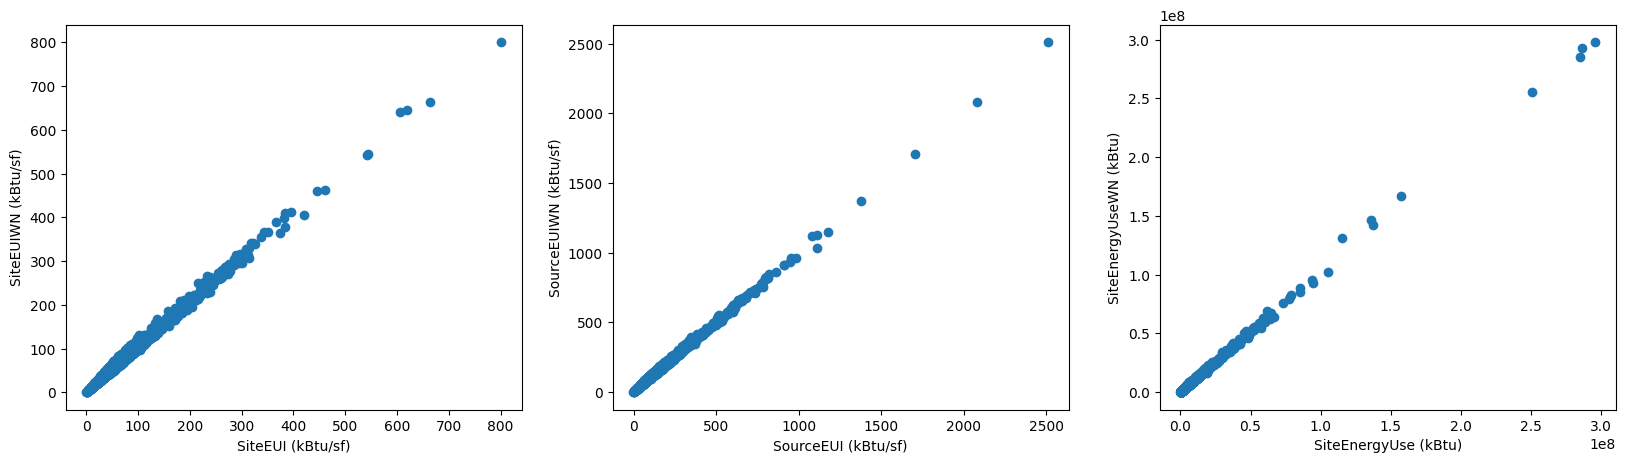

In [15]:
#Observation de la relation entre les colonnes EUI et EUIWN
#Valeurs non calculées/manquantes -> colonne EUIWN
df1 = df[df['SiteEUIWN(kBtu/sf)'] != 0].copy()

plt.rcParams["figure.figsize"] = (20, 5)
plt.subplot(1,3,1)
plt.scatter(df1['SiteEUI(kBtu/sf)'], df1['SiteEUIWN(kBtu/sf)']) 
plt.xlabel('SiteEUI (kBtu/sf)'), plt.ylabel('SiteEUIWN (kBtu/sf)')
plt.subplot(1,3,2)
plt.scatter(df1['SourceEUI(kBtu/sf)'], df1['SourceEUIWN(kBtu/sf)']) 
plt.xlabel('SourceEUI (kBtu/sf)'), plt.ylabel('SourceEUIWN (kBtu/sf)')
plt.subplot(1,3,3)
plt.scatter(df1['SiteEnergyUse(kBtu)'], df1['SiteEnergyUseWN(kBtu)']) 
plt.xlabel('SiteEnergyUse (kBtu)'), plt.ylabel('SiteEnergyUseWN (kBtu)')

In [16]:
#Calcul des corrélations (régression linéaire)
x = df1['SiteEUI(kBtu/sf)'][df1['SiteEUI(kBtu/sf)'].isna() == False]
y = df1['SiteEUIWN(kBtu/sf)'][df1['SiteEUIWN(kBtu/sf)'].isna() == False]
param_1 = linregress(x,y)
#y = 1.027 x + 2.625, R² = 0.997

x = df1['SourceEUI(kBtu/sf)'][df1['SourceEUI(kBtu/sf)'].isna() == False]
y = df1['SourceEUIWN(kBtu/sf)'][df1['SourceEUIWN(kBtu/sf)'].isna() == False]
param_2 = linregress(x,y)
#y = 0.993 x + 7.431, R² = 0.999

x = df1['SiteEnergyUse(kBtu)'][df1['SiteEnergyUse(kBtu)'].isna() == False]
y = df1['SiteEnergyUseWN(kBtu)'][df1['SiteEnergyUseWN(kBtu)'].isna() == False]
param_3 = linregress(x,y)
#y = 1.022 x + 160006.232e8, R² = 0.999

In [17]:
#Détermination des valeurs manquantes
df2 = df[df['SiteEUIWN(kBtu/sf)'] == 0].copy()
df2['SiteEUIWN(kBtu/sf)'] = df2['SiteEUI(kBtu/sf)'] * param_1.slope + param_1.intercept
df2['SourceEUIWN(kBtu/sf)'] = df2['SourceEUI(kBtu/sf)'] * param_2.slope + param_2.intercept
df2['SiteEnergyUseWN(kBtu)'] = df2['SiteEnergyUse(kBtu)'] * param_3.slope + param_3.intercept

(Text(0.5, 0, 'SiteEnergyUse (kBtu)'), Text(0, 0.5, 'SiteEnergyUseWN (kBtu)'))

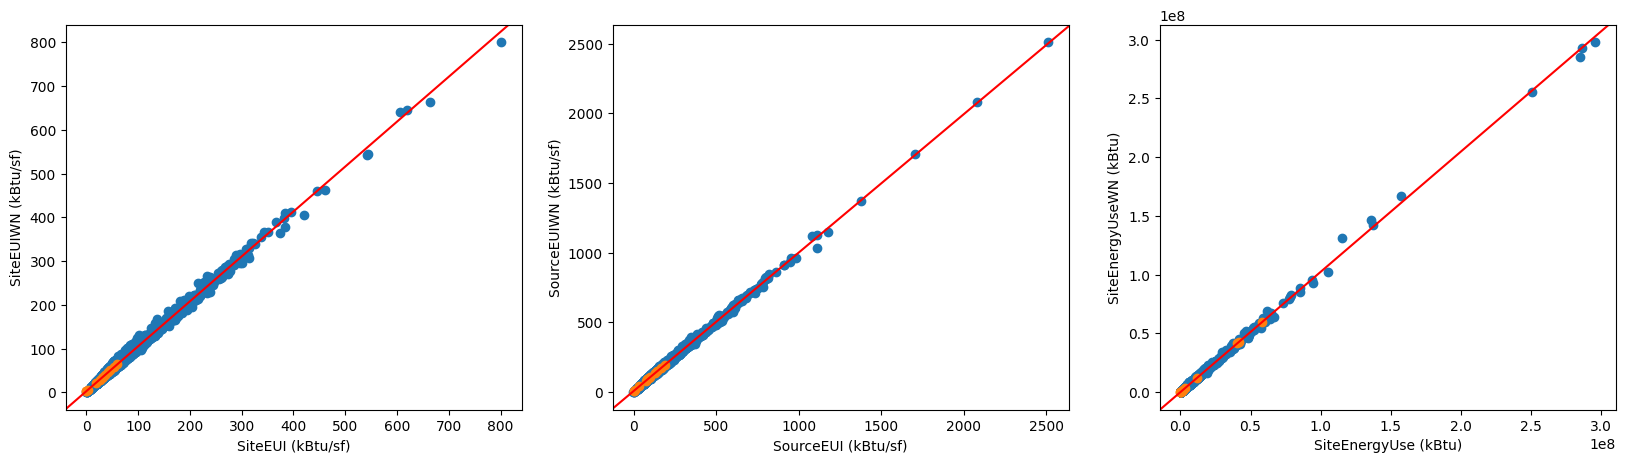

In [18]:
#Visualisation des régressions linéaires et affichage des valeurs corrigées
plt.rcParams["figure.figsize"] = (20, 5)
plt.subplot(1,3,1)
plt.scatter(df1['SiteEUI(kBtu/sf)'], df1['SiteEUIWN(kBtu/sf)']) 
plt.scatter(df2['SiteEUI(kBtu/sf)'], df2['SiteEUIWN(kBtu/sf)']) 
plt.axline(xy1=(0,param_1.intercept), slope=param_1.slope, color='red')
plt.xlabel('SiteEUI (kBtu/sf)'), plt.ylabel('SiteEUIWN (kBtu/sf)')
plt.subplot(1,3,2)
plt.scatter(df1['SourceEUI(kBtu/sf)'], df1['SourceEUIWN(kBtu/sf)']) 
plt.scatter(df2['SourceEUI(kBtu/sf)'], df2['SourceEUIWN(kBtu/sf)']) 
plt.axline(xy1=(0,param_2.intercept), slope=param_2.slope, color='red')
plt.xlabel('SourceEUI (kBtu/sf)'), plt.ylabel('SourceEUIWN (kBtu/sf)')
plt.subplot(1,3,3)
plt.scatter(df1['SiteEnergyUse(kBtu)'], df1['SiteEnergyUseWN(kBtu)']) 
plt.scatter(df2['SiteEnergyUse(kBtu)'], df2['SiteEnergyUseWN(kBtu)']) 
plt.axline(xy1=(0,param_3.intercept), slope=param_3.slope, color='red')
plt.xlabel('SiteEnergyUse (kBtu)'), plt.ylabel('SiteEnergyUseWN (kBtu)')

In [19]:
#Enregistrement des valeurs dans df
df[df['SiteEUIWN(kBtu/sf)'] == 0] = df2.copy()

In [20]:
#Valeurs aberrantes nulles -> colonne EUI
#Suppression des lignes à EUI nuls
df = df[df['SiteEUI(kBtu/sf)'] != 0]
df.shape

(3338, 30)

##### Problème des valeurs négatives dans la colonne PropertyGFABuilding(s)

(Text(0.5, 0, 'row number'), Text(0, 0.5, 'PropertyGFABuilding(s)'))

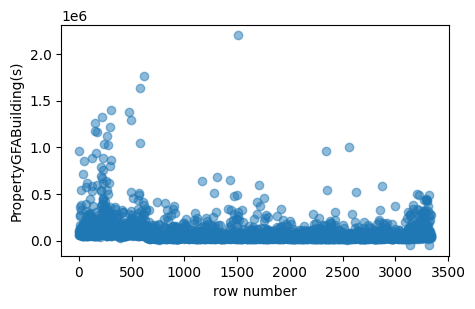

In [21]:
#Il semble avoir des valeurs négatives dans la colonne PropertyGFABuilding(s)
GFABuildings_observation = df['PropertyGFABuilding(s)']
plt.rcParams["figure.figsize"] = (5, 3)
plt.scatter(GFABuildings_observation.index,GFABuildings_observation,alpha=0.5)
plt.xlabel('row number'), plt.ylabel('PropertyGFABuilding(s)')

(Text(0.5, 0, 'row number'), Text(0, 0.5, 'PropertyGFABuilding(s)'))

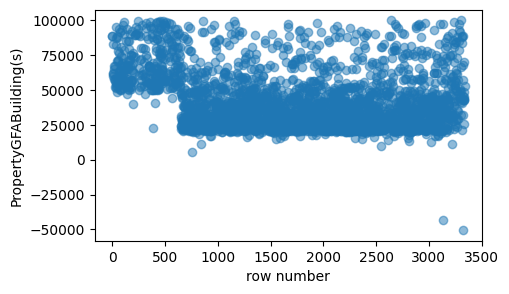

In [22]:
#Zoom vers la région y=0
GFABuildings_observation = df['PropertyGFABuilding(s)'][df['PropertyGFABuilding(s)']<1e5]
plt.rcParams["figure.figsize"] = (5, 3)
plt.scatter(GFABuildings_observation.index,GFABuildings_observation,alpha=0.5)
plt.xlabel('row number'), plt.ylabel('PropertyGFABuilding(s)')

In [23]:
#Vérification du nombre de valeurs sous 0
df['PropertyGFABuilding(s)'][df['PropertyGFABuilding(s)']<0]

3139   -43310
3322   -50550
Name: PropertyGFABuilding(s), dtype: int64

In [24]:
#Observation / recherche de la raison de l'existence de ces valeurs
df[df['PropertyGFABuilding(s)']<0]

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
3139,NonResidential,Small- and Mid-Sized Office,1982,1,5.0,54015,97325,-43310,Office,Office,54015.0,NaN,NaN,NaN,NaN,65.0,64.0,64.0,200.9,200.9,3455247.0,3455247.0,0.0,1012675.0,3455391.0,0.0,0.0,0.0,24.09,0.17
3322,NonResidential,Other,2014,1,3.0,33648,84198,-50550,"Automobile Dealership, Parking",Parking,83600.0,Automobile Dealership,39000.0,NaN,NaN,NaN,35.6,35.6,111.9,111.9,1389553.0,1389553.0,0.0,407255.0,1389610.0,0.0,0.0,0.0,9.69,0.11


In [25]:
#Les valeurs avoir mal été enregistrées (négatives au lieu de positives)

#Il y a également des incohérences entre les colonnes (ex : GFAParking a une valeur mais il n'y a pas de Parking recensé)
#La colonne GFATotal est bien égale à GFAParking + GFABuilding(s), mais les valeurs de ces dernières ne collent pas tjrs avec les PropertyGFA enregistrées

In [26]:
#Suppression des lignes
df[df['PropertyGFABuilding(s)']>0].shape
df = df[df['PropertyGFABuilding(s)']>0]

##### Problème de matching entre les valeurs des colonnes GFA

In [27]:
df.head()

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,NonResidential,Hotel,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64
1,NonResidential,Hotel,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38
2,NonResidential,Hotel,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92
3,NonResidential,Hotel,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38
4,NonResidential,Hotel,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02


In [28]:
#combien y a-til de valeurs qui ne matchent pas
#1. vérifier GFATotal = GFAParking + GFABuilding(s)
#2. regarder Somme des PropertyUseGFA = GFATotal
#(2bis. regarder si PropertyUseParking = GFAParking, et PropertyUseOther = GFABuilding(s))

In [29]:
(df['PropertyGFATotal'] == df['PropertyGFAParking']+df['PropertyGFABuilding(s)']).value_counts()

True    3336
Name: count, dtype: int64

In [30]:
(df['PropertyGFATotal'] == df['LargestPropertyUseTypeGFA']+df['SecondLargestPropertyUseTypeGFA']+df['ThirdLargestPropertyUseTypeGFA']).value_counts()

False    3234
True      102
Name: count, dtype: int64

In [31]:
#La meilleure solution serait de poser des questions aux personnes qui ont récolté les données
#Ce qui n'est pas possible

#Une autre solution serait qu'il y a des PropertyUseGFA qui sont comptabilisées et dont on ne connait pas la valeur
#Il faut regarder la cohérence entre le nombre de PropertyType total et les 3 colonnes affichées

In [32]:
df['ListOfAllPropertyUseTypes'].value_counts()

ListOfAllPropertyUseTypes
Multifamily Housing                                                              862
Multifamily Housing, Parking                                                     406
K-12 School                                                                      133
Office                                                                           131
Office, Parking                                                                  112
                                                                                ... 
Multifamily Housing, Office, Parking, Residence Hall/Dormitory, Retail Store       1
Multifamily Housing, Parking, Retail Store, Senior Care Community                  1
Enclosed Mall, Manufacturing/Industrial Plant, Office, Other - Restaurant/Bar      1
Fitness Center/Health Club/Gym, Multifamily Housing, Parking, Restaurant           1
Multifamily Housing, Non-Refrigerated Warehouse, Office, Restaurant                1
Name: count, Length: 441, dtype: int64

In [33]:
#Il y a effectivement des PropertyType dont la valeur n'est pas indiquée, mais si le problème venait effectivement de là
#les problèmes de correspondance ne devraient pas apparaître dans les cas où il n'y a que 3 ou moins PropertyType au total 
#(au moins 1644 des valeurs) 

#Une dernière possibilité serait de rechercher où est le problème : dans les valeurs liées à GFAParking ou celles liées à GFABuilding(s), 
#cependant celà n'aurait pas de réel impact. Il vaut mieux directement travailler avec les colonnes GFAParking et GFABuilding(s)

In [34]:
columns_list = ['ListOfAllPropertyUseTypes','LargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA',
        'ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA']
df.drop(columns=columns_list, inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3336 entries, 0 to 3339
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BuildingType                       3336 non-null   object 
 1   PrimaryPropertyType                3336 non-null   object 
 2   YearBuilt                          3336 non-null   int64  
 3   NumberofBuildings                  3336 non-null   int64  
 4   NumberofFloors                     3328 non-null   float64
 5   PropertyGFATotal                   3336 non-null   int64  
 6   PropertyGFAParking                 3336 non-null   int64  
 7   PropertyGFABuilding(s)             3336 non-null   int64  
 8   ENERGYSTARScore                    2559 non-null   float64
 9   SiteEUI(kBtu/sf)                   3326 non-null   float64
 10  SiteEUIWN(kBtu/sf)                 3326 non-null   float64
 11  SourceEUI(kBtu/sf)                 3326 non-null   float64
 1

##### Missing values

In [36]:
df.isna().sum()

BuildingType                           0
PrimaryPropertyType                    0
YearBuilt                              0
NumberofBuildings                      0
NumberofFloors                         8
PropertyGFATotal                       0
PropertyGFAParking                     0
PropertyGFABuilding(s)                 0
ENERGYSTARScore                      777
SiteEUI(kBtu/sf)                      10
SiteEUIWN(kBtu/sf)                    10
SourceEUI(kBtu/sf)                    10
SourceEUIWN(kBtu/sf)                  10
SiteEnergyUse(kBtu)                   10
SiteEnergyUseWN(kBtu)                 10
SteamUse(kBtu)                        10
Electricity(kWh)                      10
Electricity(kBtu)                     10
NaturalGas(therms)                    10
NaturalGas(kBtu)                      10
OtherFuelUse(kBtu)                    10
GHGEmissions(MetricTonsCO2e)          10
GHGEmissionsIntensity(kgCO2e/ft2)     10
dtype: int64

In [37]:
#La colonne ENERGYSTARScored est là à titre indicatif / observationnel d'un "classement énergétique", le fait qu'il manque 
#des valeurs n'est donc pas un problème

In [38]:
#Colonnes énergétiques
df[df['SiteEUI(kBtu/sf)'].isna() == True]

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
62,SPS-District K-12,K-12 School,1948,1,2.0,53352,0,53352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
719,SPS-District K-12,K-12 School,1925,1,2.0,37327,0,37327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,Multifamily LR (1-4),Low-Rise Multifamily,1977,1,3.0,33166,0,33166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1346,Multifamily LR (1-4),Low-Rise Multifamily,1967,1,4.0,40086,6133,33953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1358,SPS-District K-12,K-12 School,1950,1,1.0,34005,0,34005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1360,SPS-District K-12,K-12 School,1949,1,1.0,41221,0,41221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1838,Multifamily LR (1-4),Low-Rise Multifamily,1930,1,3.0,53040,0,53040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2108,SPS-District K-12,K-12 School,1953,1,1.0,110830,0,110830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2381,SPS-District K-12,K-12 School,1961,1,1.0,43578,0,43578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2406,NonResidential,Restaurant\n,1978,1,2.0,26519,0,26519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='YearBuilt'>

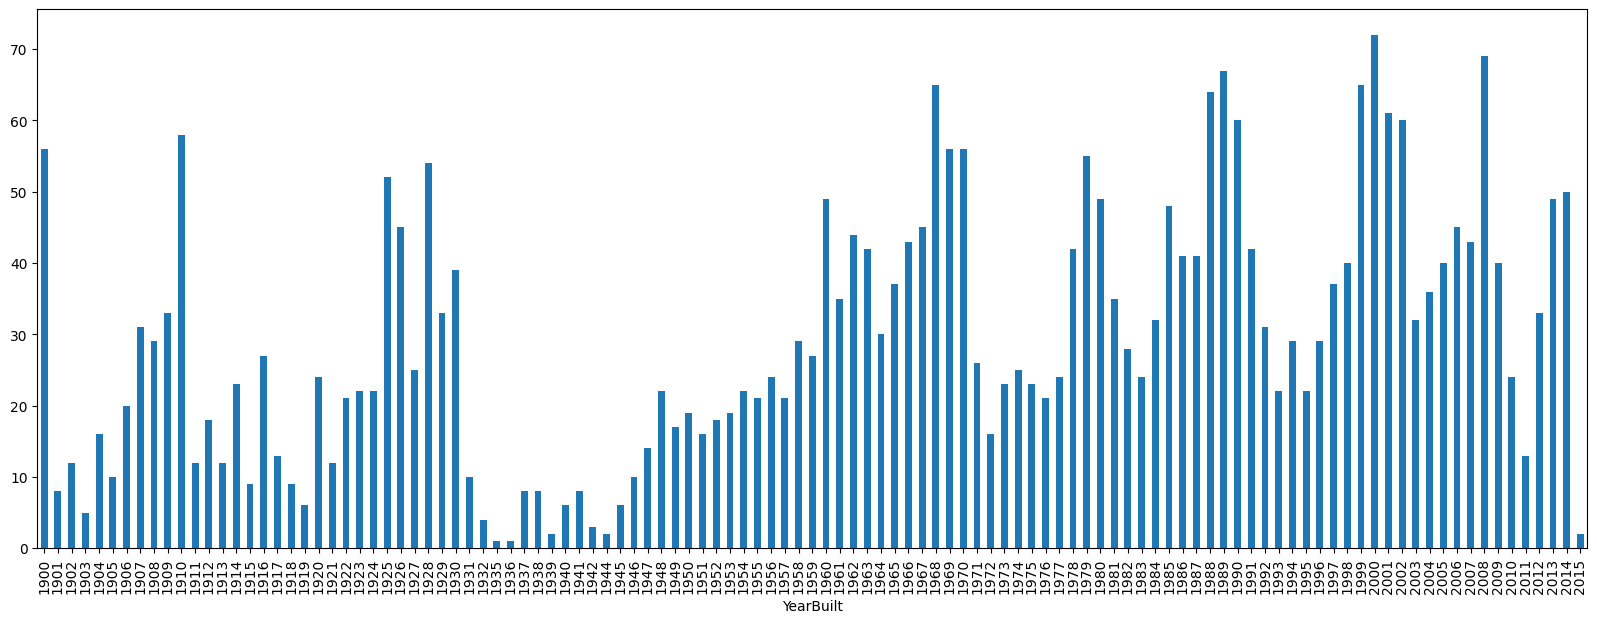

In [39]:
#Les missing values viennent peut-être du fait que les bâtiments soient anciens
df[df['SiteEUI(kBtu/sf)'].isna() == False].groupby('YearBuilt')['YearBuilt'].value_counts().plot(kind='bar', figsize=(20,7))

In [40]:
#Les valeurs semblent être juste des missings values, sans corrélation avec une autre variable
#Toutes les missing values des colonnes liées à l'énergie sont comprises, on peut donc juste supprimer ces lignes
df.shape
df = df[df['SiteEUI(kBtu/sf)'].isna() == False]

In [41]:
df.isna().sum()

BuildingType                           0
PrimaryPropertyType                    0
YearBuilt                              0
NumberofBuildings                      0
NumberofFloors                         8
PropertyGFATotal                       0
PropertyGFAParking                     0
PropertyGFABuilding(s)                 0
ENERGYSTARScore                      767
SiteEUI(kBtu/sf)                       0
SiteEUIWN(kBtu/sf)                     0
SourceEUI(kBtu/sf)                     0
SourceEUIWN(kBtu/sf)                   0
SiteEnergyUse(kBtu)                    0
SiteEnergyUseWN(kBtu)                  0
SteamUse(kBtu)                         0
Electricity(kWh)                       0
Electricity(kBtu)                      0
NaturalGas(therms)                     0
NaturalGas(kBtu)                       0
OtherFuelUse(kBtu)                     0
GHGEmissions(MetricTonsCO2e)           0
GHGEmissionsIntensity(kgCO2e/ft2)      0
dtype: int64

In [42]:
df[df['NumberofFloors'].isna() == True]

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
2015,Campus,Other,1991,10,NaN,180796,0,180796,NaN,129.6,146.7,287.4,305.3,29939196.0,33884892.0,0.0,4900163.0,16720050.0,132198.0,13219839.0,0.0,818.66,4.13
3171,NonResidential,Non-Refrigerated Warehouse,1940,1,NaN,384772,0,384772,65.0,37.2,40.4,84.2,87.5,15411831.0,16729664.0,0.0,2615758.0,8925337.0,64869.0,6486866.0,0.0,406.74,0.96
3172,NonResidential,Medical Office,1960,1,NaN,30287,0,30287,56.0,62.1,65.5,174.9,178.5,1976647.0,2085495.0,0.0,489786.0,1671219.0,3055.0,305497.0,0.0,27.88,0.68
3173,NonResidential,Medical Office,1960,1,NaN,21931,0,21931,21.0,133.3,157.9,238.0,263.8,3732139.0,4422217.0,0.0,384833.0,1313104.0,24191.0,2419089.0,0.0,137.63,6.02
3193,Nonresidential COS,Other,1906,1,NaN,39212,0,39212,NaN,19.7,19.7,61.9,61.9,773013.0,773013.0,0.0,226557.0,773045.0,0.0,0.0,0.0,5.39,0.05
3209,Nonresidential COS,Other,1929,7,NaN,502030,0,502030,NaN,30.6,36.6,68.0,76.3,17290816.0,20657716.0,0.0,2831519.0,9661544.0,76297.0,7629673.0,0.0,472.56,0.86
3311,Nonresidential COS,Other,2014,1,NaN,20993,0,20993,NaN,43.5,47.6,123.8,131.1,912558.0,998308.0,0.0,229871.0,784351.0,1282.0,128239.0,0.0,12.28,0.42
3313,NonResidential,Other,2009,1,NaN,40265,0,40265,NaN,48.6,54.1,120.3,127.2,1957356.0,2176523.0,0.0,391024.0,1334228.0,6232.0,623184.0,0.0,42.40,0.91


In [43]:
#Les valeurs manquantes sont peut-être liées au type de bâtiment
df[df['BuildingType'] == 'Campus']
df[df['BuildingType'] == 'NonResidential']

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,NonResidential,Hotel,1927,1,12.0,88434,0,88434,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64
1,NonResidential,Hotel,1996,1,11.0,103566,15064,88502,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38
2,NonResidential,Hotel,1969,1,41.0,961990,0,961990,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92
3,NonResidential,Hotel,1926,1,10.0,61320,0,61320,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38
4,NonResidential,Hotel,1980,1,18.0,119890,12460,107430,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,NonResidential,Supermarket/Grocery Store,2010,1,8.0,41198,0,41198,64.0,167.0,167.0,494.3,494.3,6879291.0,6879291.0,0.0,1842623.0,6287291.0,5923.0,592260.0,0.0,75.28,1.17
3313,NonResidential,Other,2009,1,NaN,40265,0,40265,NaN,48.6,54.1,120.3,127.2,1957356.0,2176523.0,0.0,391024.0,1334228.0,6232.0,623184.0,0.0,42.40,0.91
3314,NonResidential,Large Office,2014,1,6.0,427181,169195,257986,99.0,39.2,40.7,113.0,115.8,16730779.0,17371762.0,0.0,4306088.0,14692982.0,20384.0,2038408.0,0.0,210.69,0.35
3319,NonResidential,Self-Storage Facility\n,2014,1,4.0,101580,14004,87576,NaN,9.7,9.7,27.2,27.2,850568.0,850568.0,0.0,208197.0,710399.0,1402.0,140199.0,0.0,12.40,0.09


In [44]:
#Celà ne semble pas être la cas. Le nommbre de lignes NaN étant petit, on peut les supprimer
print(df.shape)
df = df[df['NumberofFloors'].isna() == False]
df.shape

(3326, 23)


(3318, 23)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3318 entries, 0 to 3339
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BuildingType                       3318 non-null   object 
 1   PrimaryPropertyType                3318 non-null   object 
 2   YearBuilt                          3318 non-null   int64  
 3   NumberofBuildings                  3318 non-null   int64  
 4   NumberofFloors                     3318 non-null   float64
 5   PropertyGFATotal                   3318 non-null   int64  
 6   PropertyGFAParking                 3318 non-null   int64  
 7   PropertyGFABuilding(s)             3318 non-null   int64  
 8   ENERGYSTARScore                    2556 non-null   float64
 9   SiteEUI(kBtu/sf)                   3318 non-null   float64
 10  SiteEUIWN(kBtu/sf)                 3318 non-null   float64
 11  SourceEUI(kBtu/sf)                 3318 non-null   float64
 1

In [46]:
#Checking values in columns of dtypes='object'
df['BuildingType'].value_counts()
df['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Low-Rise Multifamily           995
Mid-Rise Multifamily           539
Small- and Mid-Sized Office    296
Other                          252
Non-Refrigerated Warehouse     186
Large Office                   170
K-12 School                    130
Mixed Use Property             126
High-Rise Multifamily          103
Retail Store                    99
Hotel                           73
Worship Facility                72
Distribution Center\n           51
Senior Care Community           43
Medical Office                  41
Supermarket/Grocery Store       36
Self-Storage Facility\n         27
College/University              22
Residence Hall/Dormitory        15
Refrigerated Warehouse          13
Restaurant\n                    10
Hospital                        10
SPS-District K-12                4
Distribution Center              2
Laboratory                       1
Self-Storage Facility            1
Restaurant                       1
Name: count, dtype: int64

In [47]:
for i in range(len(df)):
    df.iloc[i,1] = str(df.iloc[i,1]).strip('\n')

df['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Low-Rise Multifamily           995
Mid-Rise Multifamily           539
Small- and Mid-Sized Office    296
Other                          252
Non-Refrigerated Warehouse     186
Large Office                   170
K-12 School                    130
Mixed Use Property             126
High-Rise Multifamily          103
Retail Store                    99
Hotel                           73
Worship Facility                72
Distribution Center             53
Senior Care Community           43
Medical Office                  41
Supermarket/Grocery Store       36
Self-Storage Facility           28
College/University              22
Residence Hall/Dormitory        15
Refrigerated Warehouse          13
Restaurant                      11
Hospital                        10
SPS-District K-12                4
Laboratory                       1
Name: count, dtype: int64

### Analyse des données

In [48]:
##Qu'est-ce qui consomme le plus d'énergie ? :
#Quel type de structure consomme le plus d'énergie ?
#Quelle source d'énergie est la plus utilisée pour le moment, et son impact énergétique ?
#Quels sont les paramètres qui sont déterminants pour l'impact énergétique ?

In [49]:
df.head()

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,NonResidential,Hotel,1927,1,12.0,88434,0,88434,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64
1,NonResidential,Hotel,1996,1,11.0,103566,15064,88502,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38
2,NonResidential,Hotel,1969,1,41.0,961990,0,961990,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92
3,NonResidential,Hotel,1926,1,10.0,61320,0,61320,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38
4,NonResidential,Hotel,1980,1,18.0,119890,12460,107430,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02


##### Plan d'analyse

In [50]:
#Quel type de structure consomme le plus d'énergie ? 
#buildings : energy/m² (comparaison avec d'autres buildings). Certains types de buildings de base vont consommer plus (ex: hopital vs école)
#Energystar : Score of 50 (median energy performance), score of 75 or higher (top energy performer)

#1. qu'est-ce qui consomme le plus en terme de structure
#2. est-ce que les structures qui consomment beaucoup ont une gestion d'énergie efficace
#3. quels paramètres semblent influencer sur la performance (différencier pour un même type de bâtiment)

#colonnes à utiliser:
#1. PrimaryPropertyType, (BuildingType), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf)
#2-3. Energystar, NumberofBuildings, NumberofFloors / SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), Energy columns / (YearBuilt)

##### Point 1 : Quel type de structure consomme le plus d'énergie

In [51]:
#1. qu'est-ce qui consomme le plus en terme de structure
df1 = df[['PrimaryPropertyType','BuildingType','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)']].copy()
df1.head()

,PrimaryPropertyType,BuildingType,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf)
0,Hotel,NonResidential,173.5,175.1
1,Hotel,NonResidential,191.3,195.2
2,Hotel,NonResidential,242.7,246.5
3,Hotel,NonResidential,636.3,643.2
4,Hotel,NonResidential,228.8,227.1


<Axes: xlabel='PrimaryPropertyType'>

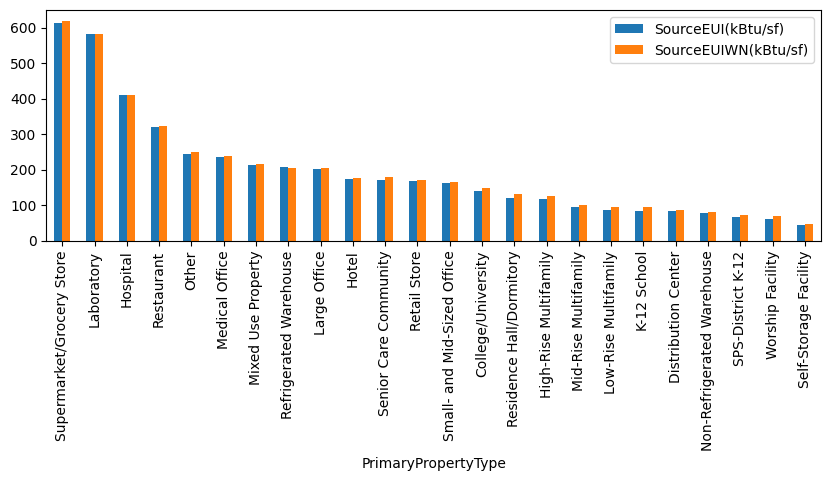

In [52]:
columns = ['SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)']
df1.groupby('PrimaryPropertyType')[columns].mean().sort_values(by=columns, ascending=False).plot(kind='bar', figsize=(10,3))

<Axes: xlabel='BuildingType'>

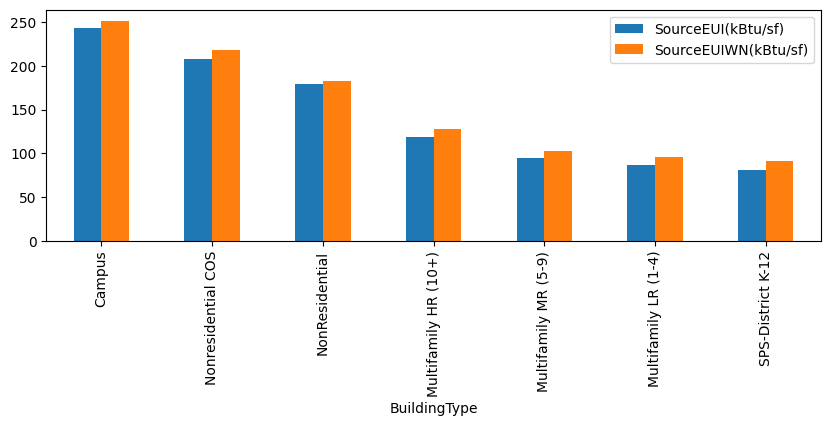

In [53]:
df1.groupby('BuildingType')[columns].mean().sort_values(by=columns, ascending=False).plot(kind='bar', figsize=(10,3))

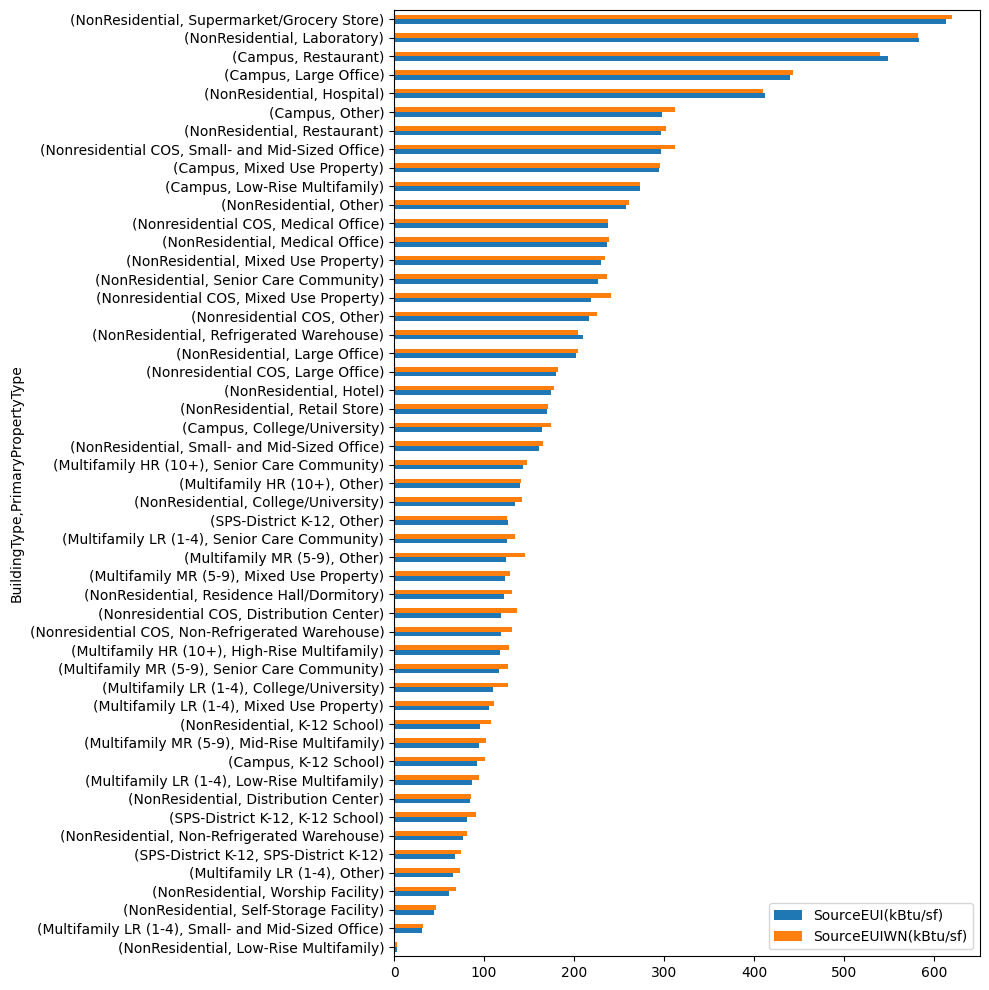

In [54]:
df1.groupby(['BuildingType','PrimaryPropertyType'])[columns].mean().sort_values(by=columns).plot(kind='barh', figsize=(10,10))
plt.tight_layout()

In [55]:
#Les structures qui consomment le plus sont : 
# - Non residential : Supermarket/Grocery Store, Laboratory
# - Campus : Restaurant, Large Office 
# - Non residential : Hospital

##### Point 2 : Est-ce que les structures qui consomment le plus ont une gestion de l'énergie efficace

In [56]:
#2. est-ce que les structures qui consomment beaucoup ont une gestion d'énergie qui est efficace
#(ex: comparaison energystar performance pour un même type de bâtiments)
df1 = df1.join(df[['ENERGYSTARScore','NumberofBuildings','NumberofFloors']])

In [57]:
df1.head()

,PrimaryPropertyType,BuildingType,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),ENERGYSTARScore,NumberofBuildings,NumberofFloors
0,Hotel,NonResidential,173.5,175.1,65.0,1,12.0
1,Hotel,NonResidential,191.3,195.2,51.0,1,11.0
2,Hotel,NonResidential,242.7,246.5,18.0,1,41.0
3,Hotel,NonResidential,636.3,643.2,1.0,1,10.0
4,Hotel,NonResidential,228.8,227.1,67.0,1,18.0


In [58]:
#Trier par (Buildingtype, Propertytype) et par (plus grande valeur d'Energyscore, plus grand nombre de points Energyscore)
#plot avec une condition ==> créer une nouvelle colonne (aller chercher la valeur séparément)
df1['AllTypes'] = df1['BuildingType']+', '+df1['PrimaryPropertyType']
df.head()

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,NonResidential,Hotel,1927,1,12.0,88434,0,88434,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64
1,NonResidential,Hotel,1996,1,11.0,103566,15064,88502,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38
2,NonResidential,Hotel,1969,1,41.0,961990,0,961990,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92
3,NonResidential,Hotel,1926,1,10.0,61320,0,61320,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38
4,NonResidential,Hotel,1980,1,18.0,119890,12460,107430,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02


In [59]:
# -sort selon les duo qui ont la plus grande valeur de Energyscore 
#Regrouper par duo building-property, et pour chaque duo prendre la valeur max
energy_ranked = pd.DataFrame(df1.groupby(by=['AllTypes']).max()['ENERGYSTARScore'].sort_values())
energy_ranked.reset_index(inplace=True)
energy_ranked.insert(len(energy_ranked.columns),'Rank', np.zeros(len(energy_ranked),dtype=int))

#Regarder les valeurs, à chaque valeur attribuer un chiffre
values = energy_ranked['ENERGYSTARScore'].value_counts().index.to_list()
values.sort()

nan_list = energy_ranked[energy_ranked['ENERGYSTARScore'].isna()==True].index
for i in range(len(energy_ranked)):
    for value in values:
        if i in nan_list:
            energy_ranked.loc[i,'Rank'] = 0
        elif i not in nan_list and energy_ranked.loc[i,'ENERGYSTARScore'] == value:
            energy_ranked.loc[i,'Rank'] = values.index(value)+1
energy_ranked

#Donner ce chiffre pour les valeurs de df1 correspondantes
#df1.insert(len(df1.columns),'Energyscore_Groups_rank', np.zeros(len(df1),dtype=int)) 
for i in df1.index:
    for j in range(len(energy_ranked)):
        if df1.loc[i,'AllTypes'] == energy_ranked.loc[j,'AllTypes']:
            df1.loc[i,'Energyscore_Groups_rank'] = energy_ranked.loc[j,'Rank']
        else:
            continue

In [60]:
# -sort selon les duo qui ont le plus grand nombre de points  
#Regrouper par duo building-property, et pour chaque duo prendre la liste des lignes correspondantes
points_number = df1.groupby(by=['AllTypes'])['ENERGYSTARScore'].groups
points_number

#Attribuer la valeur du nombre de lignes pour chaque duo 
#df1.insert(len(df1.columns),'Energyscore_Points_number', np.zeros(len(df1),dtype=int)) 
nan_list = df1[df1['ENERGYSTARScore'].isna()==True].index
for i in df1.index:
    for key in points_number.keys():
        if i in points_number[key]:
            df1.loc[i,'Energyscore_Points_number'] = len(points_number[key])
        elif i in nan_list:
            df1.loc[i,'Energyscore_Points_number'] = 0
        else:
            continue


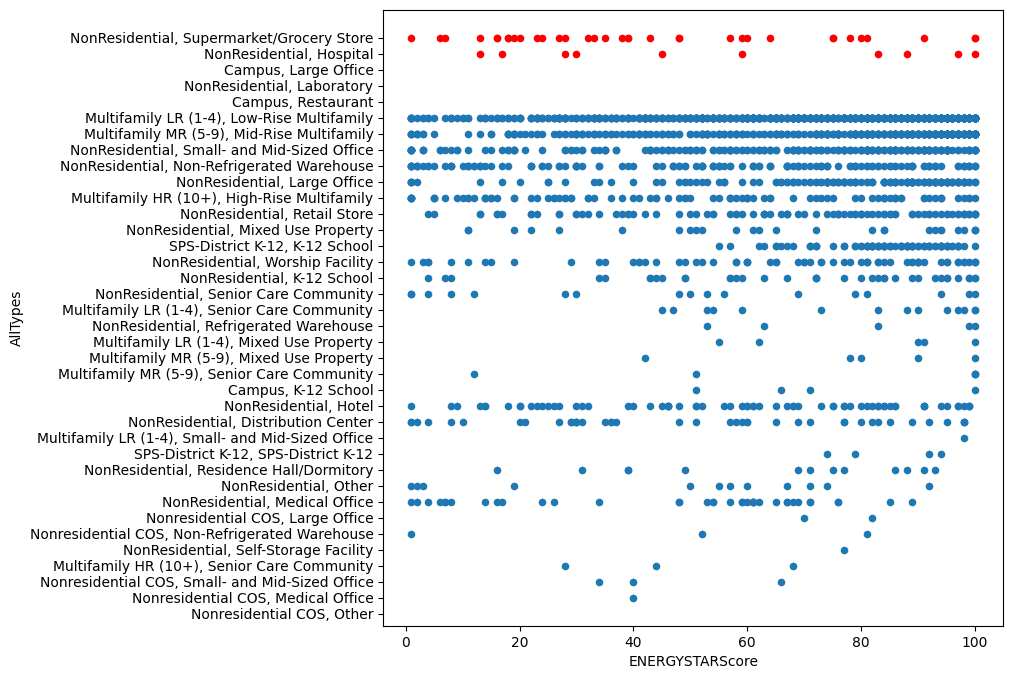

In [61]:
#Liste des structures qui consomment beaucoup
values = ['NonResidential, Supermarket/Grocery Store','NonResidential, Laboratory','Campus, Restaurant','Campus, Large Office','NonResidential, Hospital']

df1_a = df1[(df1['AllTypes'].isin(values))==True].sort_values(by=['Energyscore_Groups_rank','Energyscore_Points_number'], ascending=False)
df1_b = df1[(df1['AllTypes'].isin(values))==False].sort_values(by=['Energyscore_Groups_rank','Energyscore_Points_number'], ascending=False)

#Plot et comparaison avec les autres structures
#Energystar : Score of 50 (median energy performance), score of 75 or higher (top energy performer)
ax = df1_a.plot(x='ENERGYSTARScore', y='AllTypes', kind='scatter', figsize=(8,8), c='red')
df1_b.plot(x='ENERGYSTARScore', y='AllTypes', kind='scatter', figsize=(8,8), ax=ax)
plt.gca().invert_yaxis()

#df1.sort_values(by=['Energyscore_Groups_rank','Energyscore_Points_number'], ascending=False).plot(x='ENERGYSTARScore', y='AllTypes', kind='scatter', figsize=(8,8))
#plt.gca().invert_yaxis()


In [62]:
#Il manque des données pour les valeurs cibles, mais l'ont voit que quel que soit le groupe, il y a des scores très diversifiés
#Les structures qui consomment le plus ne performent pas mieux ou pire que d'autres 

##### Point 3 : Quels paramètres semblent influer sur la performance

In [63]:
#3. quels paramètres semblent influencer sur la performance
#Qu'est-ce qui fait qu'un bâtiment en rentable énergétiquement ?

#Energyscore : informations officielles
#Energyscore reliée à ratio SourceEnergy/SourceEnergy théorique (énergie dépensée/énergie nécessaire), pour le BuildingType correspondant
#Regarder SourceEUI selon le type de bâtiment et ses caractéristiques (étages, etc)

<Axes: xlabel='ENERGYSTARScore', ylabel='SourceEUI(kBtu/sf)'>

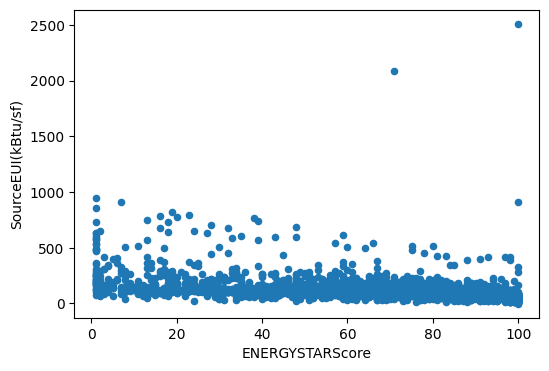

In [92]:
#Observation du lien entre Energystar et SourceEUI
df1.plot(x='ENERGYSTARScore', y='SourceEUI(kBtu/sf)', kind='scatter', figsize=(6,4))

#Pour une même valeur de SourceEUI on a des Energystar différents
#Ne dépend effectivement pas de la quantité d'énergie dépensée, mais plutôt à quel point elle est dépensée efficacement / de façon utile

#Pour une même valeur Energystar on a plusieurs valeurs de SourceEUI
#Sous-entend qu'avec des valeurs de SourceEUI différentes on peut avoir le même classement -> la performance dépend donc du type de building

<Axes: xlabel='ENERGYSTARScore', ylabel='BuildingType'>

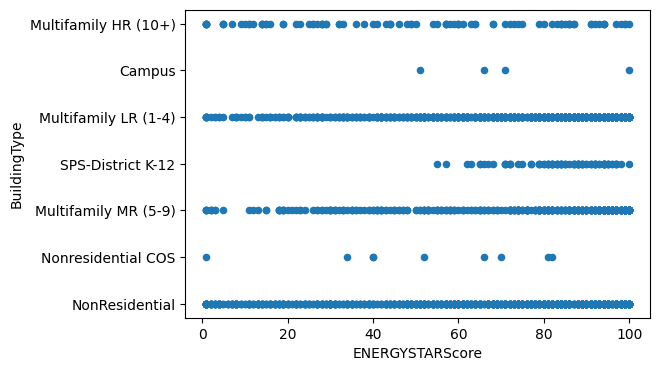

In [93]:
df1.plot(x='ENERGYSTARScore', y='BuildingType', kind='scatter', figsize=(6,4))
#Ne dépend pas du type de bâtiment (mêmes valeurs pour des Energystar différents), mais peut-être de ses caractéristiques internes

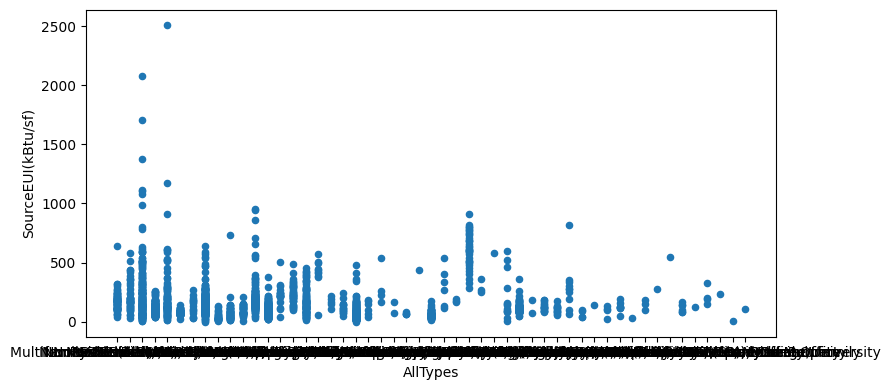

In [76]:
df2.plot(kind='scatter', y='SourceEUI(kBtu/sf)', x='AllTypes', figsize=(9,4))
plt.tight_layout()

In [ ]:
#Le type de propriété n'est pas une caractéristique interne suffisante 
#Dans chaque BuildingType / PropertyType je peux regarder : 
#- la taille (totale), la quantité d'énergie utilisée (EUI ou EUIWN), le type d'énergie utilisée (kBtu)

#colonnes : 'PropertyGFATotal','SourceEUI(kBtu/sf)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','OtherFuelUse(kBtu)'

In [95]:
#dataframe qui regroupe tout
df2 = df.copy()
df2.insert(2, 'AllTypes', df1['AllTypes'])
df2.insert(10, 'Energyscore_Groups_rank', df1['Energyscore_Groups_rank'])
df2.insert(11, 'Energyscore_Points_number', df1['Energyscore_Points_number'])

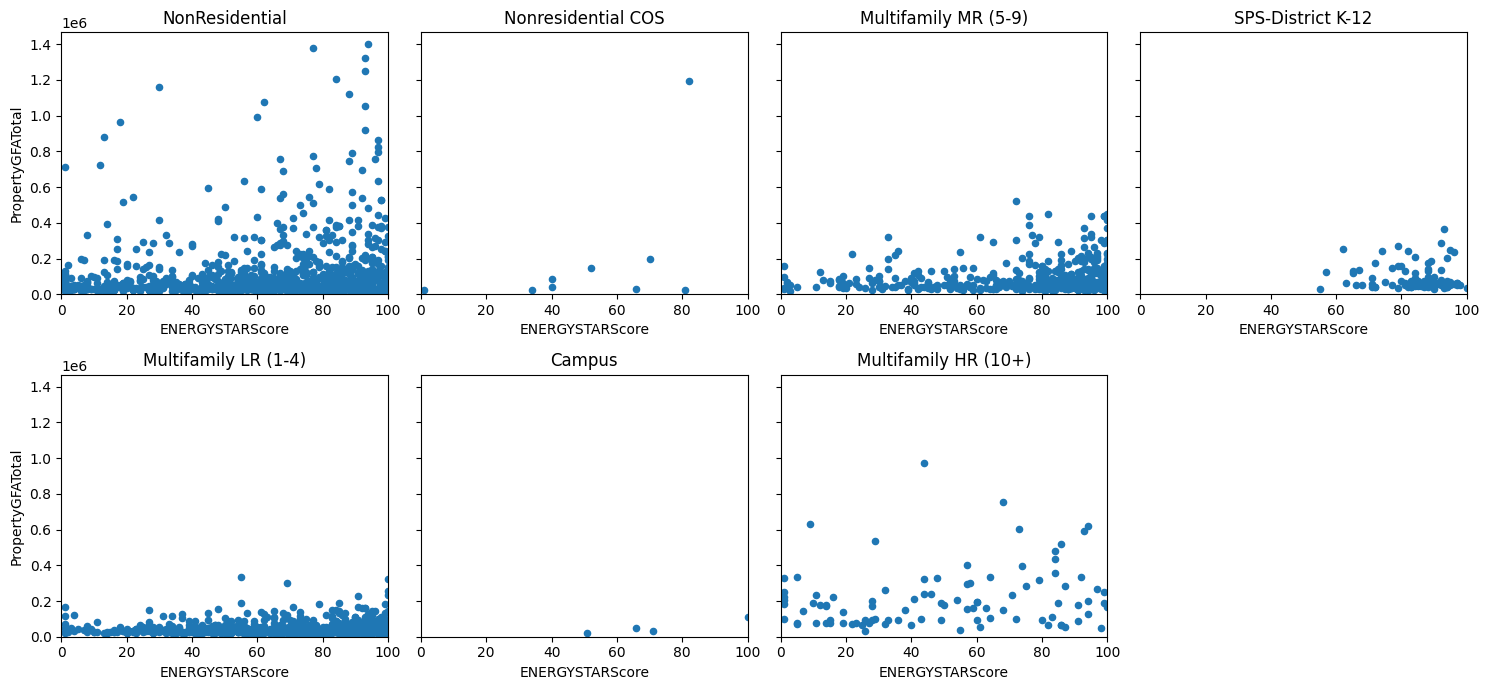

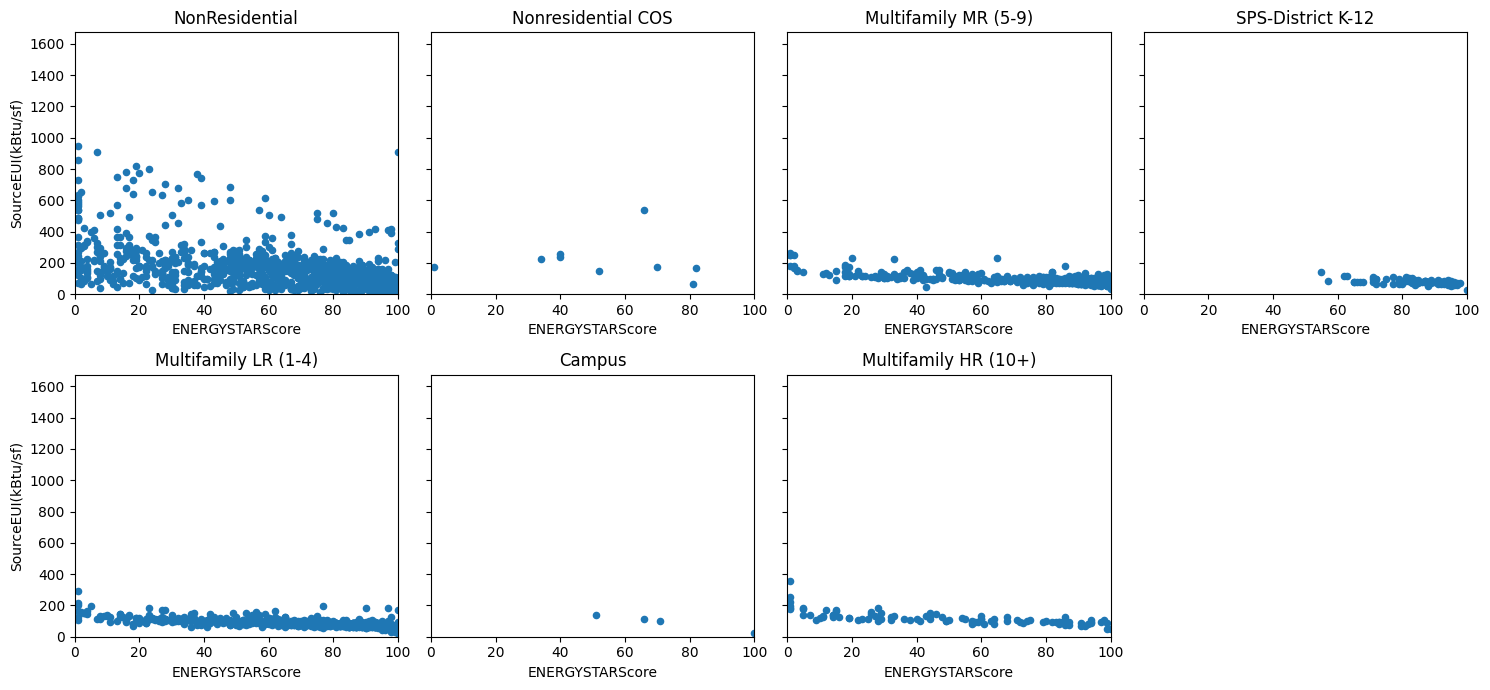

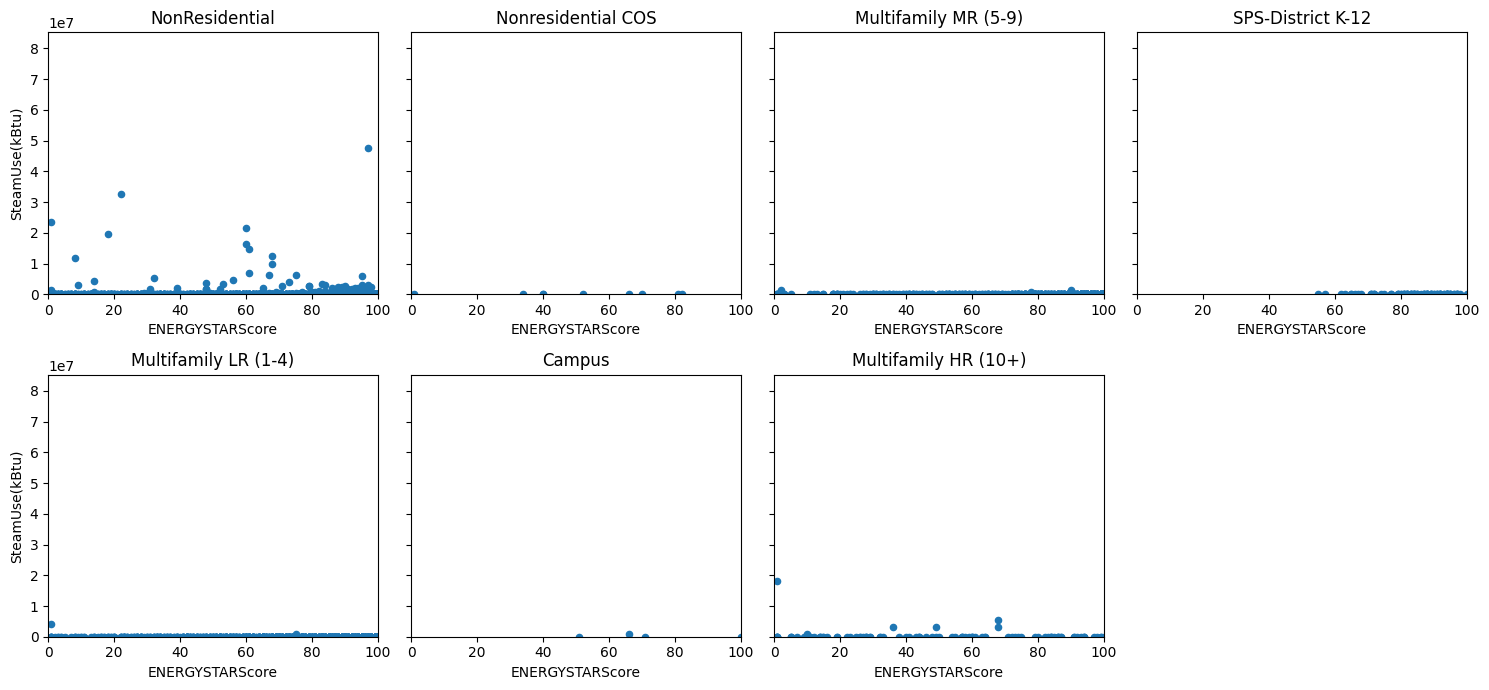

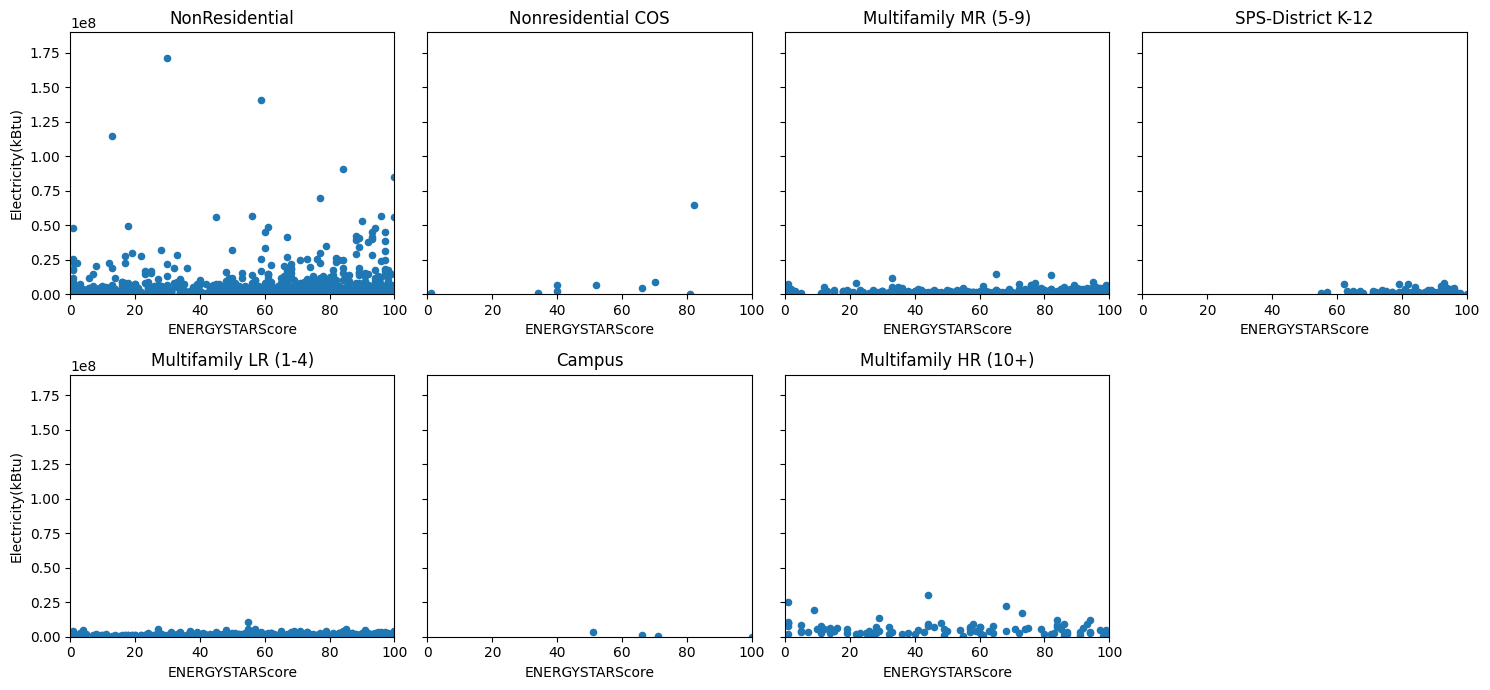

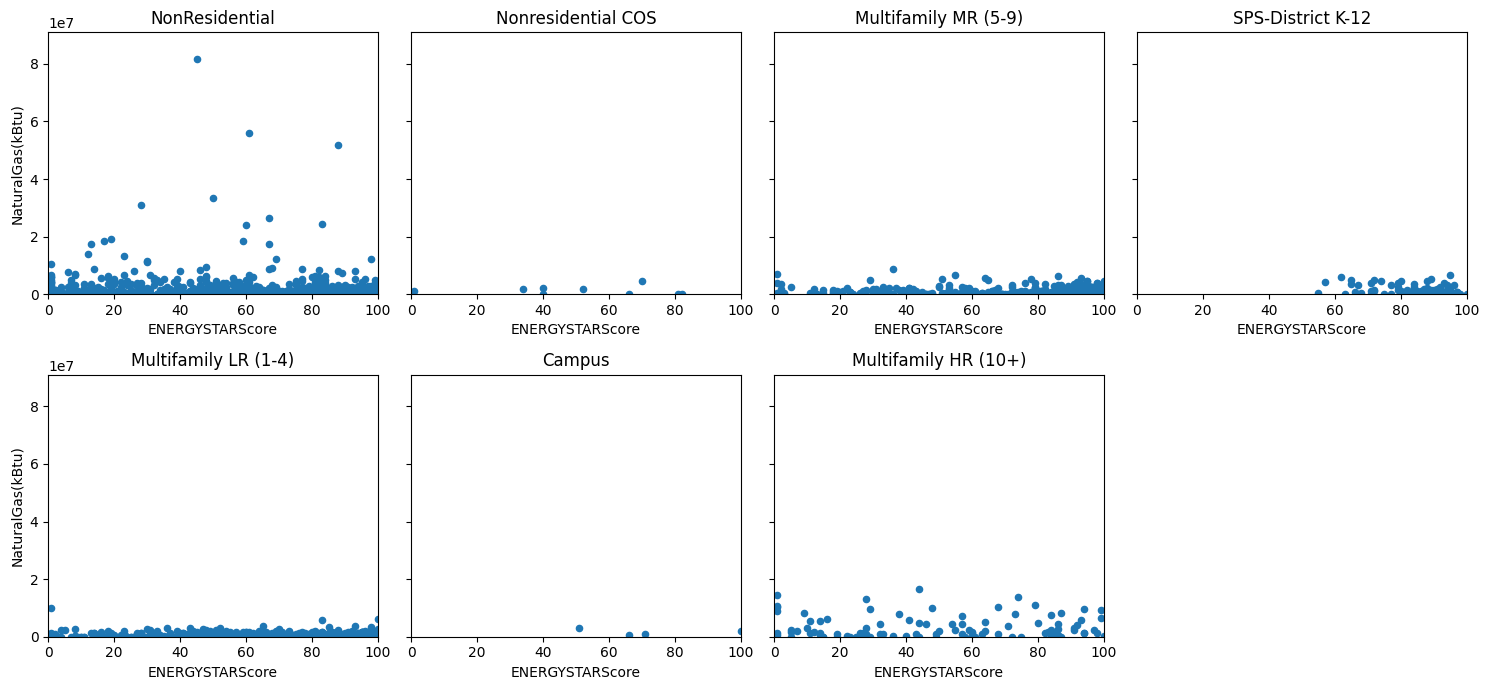

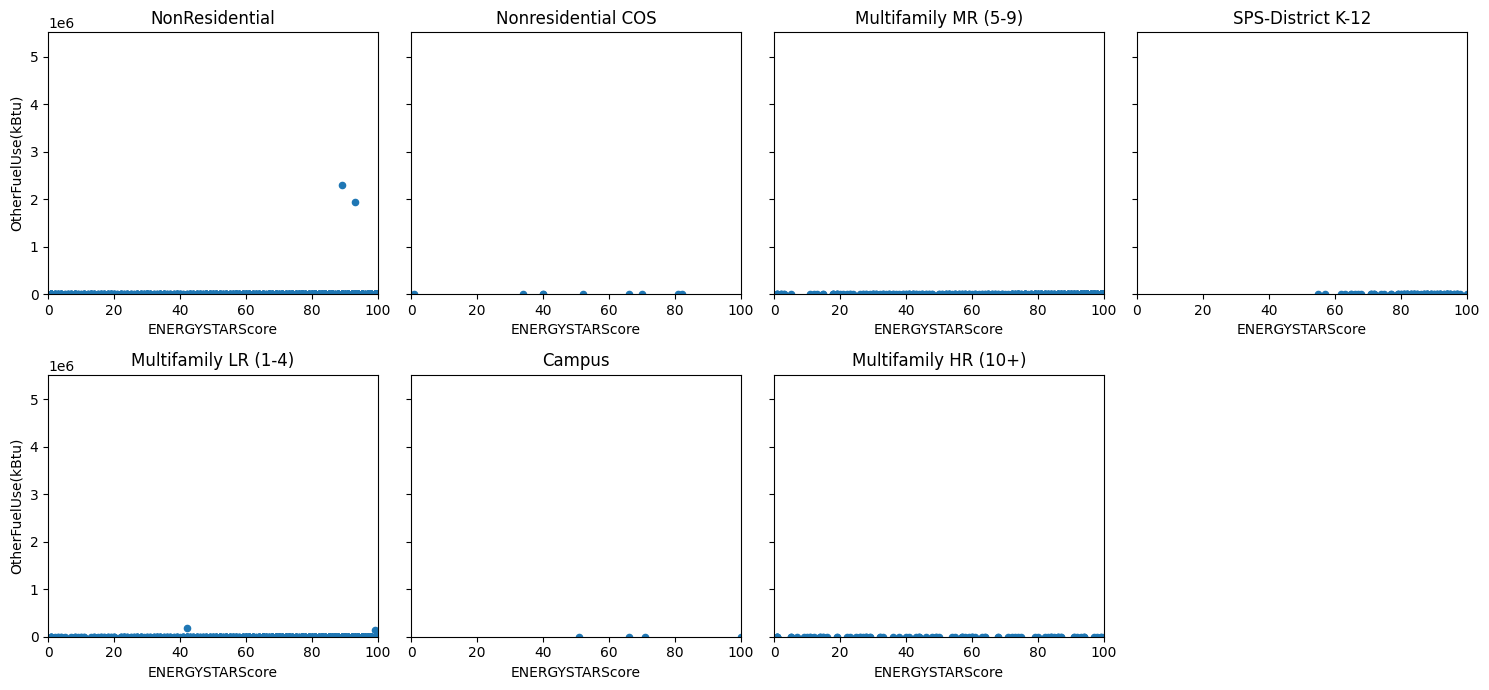

In [111]:
#sélection des valeurs uniques pour le type de bâtiment
property_list = df2['BuildingType'].unique()

#sélection des colonnes
columns_list = ['PropertyGFATotal','SourceEUI(kBtu/sf)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','OtherFuelUse(kBtu)']

#plotting
for column in columns_list:
    ncol = 4
    nrow = int(len(property_list)/ncol) + bool(len(property_list)/ncol%1)
    fig, axes = plt.subplots(nrow, ncol, figsize=(15, 7), sharey=True)

    i = 0
    for r in range(nrow):
        if r == nrow-1:
            ncol_last = round(ncol * (len(property_list)/ncol%1)) 
            for n in range(ncol_last,ncol):
                axes[r,n].set_axis_off()
            ncol = ncol_last

        for c in range(ncol):
            axes[r,c].set_title(property_list[i])
            axes[r,c].set_xlim(0,100)
            plt.ylim(top=df2[column].max()*2/3)
            df2[df2['BuildingType']==property_list[i]].plot(ax=axes[r,c], kind='scatter', x='ENERGYSTARScore', y=column)
            i += 1
    plt.tight_layout()

In [ ]:
#Conclusion :
#Les données ne semblent pas suffisantes pour déterminer réellement ce qui fait qu'un bâtiment est rentable énergétiquement

#Pour tous les BuildingTypes on remarque un même schéma : quelque soit la colonne observée, les points sont dispersés sur tout Energystar
#Les différents BuildingTypes regroupent donc tout autant des bâtiments à bonne et mauvaise consommation énergétique. Certains pourraient 
#avoir une meilleure performance énergétique (SPS-District K-12) , mais celà pourrait être lié au faible nombre de points disponibles.
#Les types d'énergie utilisée ne diffèrent pas vraiment non plus, si ce n'est que l'électricité a l'air plus utilisée que le gaz naturel et
#la vapeur. 

#Compléments :
#Il pourrait être intéressant de comparer les catégories, en regardant sur plusieurs dimensions en même temps

#L'efficacité énergétique semble être plus déterminée par la bonne utilisation de ce que l'on a (type d'énergie, de bâtiment), que par ce que 
#l'on a à notre disposition. Il faudrait donc des données sur l'allouement de l'énergie / comment elle est répartie de façon interne pour 
#chaque BuildingType/PropertyType, ce qui permettrait de voir à quel niveau se situent les différences et donc ce qui différencie les scores de 
#performance.